# IT'S.....PRECIPITATION TIME!

# Introduction + data used:
- In this assignment, you'll explore precipitation data!
<br><br>
- What you'll be analyzing is daily precipitation data for the continental US for the year 2024!
<br><br>
- It's important to clarify that this is *liquid* precipitation - so snow is measured by its liquid equivalent 
<br><br>|
- Want more information on the data? (You should! #metadataisimportant): 
https://psl.noaa.gov/repository/entry/show/PSL+Climate+Data+Repository/Public/PSL+Datasets/PSL+Gridded+Datasets/cpc_us_precip/RT/precip.V1.0.2024.nc?entryid=synth%3Ae570c8f9-ec09-4e89-93b4-babd5651e7a9%3AL2NwY191c19wcmVjaXAvUlQvcHJlY2lwLlYxLjAuMjAyNC5uYw%3D%3D&output=data.cdl 

#### Import xarray as xr, numpy as np, and pyplot from matplotlib as plt

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

#### Let's open our data file! *I GIVE YOU THE CODE FOR THIS*

In [2]:
# open_dataarray is one of the main functions in Xarray to open a Netcdf file!
# the other function is open_dataset.  If our netcdf file contained MULTIPLE variables
# say, precip, and temperature, etc.
# we would instead open it as a dataset, and access specific variables separately
data = xr.open_dataarray('precip.V1.0.2024.nc')

#### Prints out information about the data in this Netcdf file.  *I GIVE YOU THE CODE FOR THIS*
- Remember: Netcdf is a binary file format, and we'll work a lot with it in future using the Xarray package, especially for *spatial* data!

In [3]:
# Print
print(data) # since we opened this Netcdf file and read directly in a data array variable
            # 'data' contains the precipitation data we are working with

<xarray.DataArray 'precip' (time: 366, lat: 120, lon: 300)> Size: 53MB
[13176000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 1kB 230.1 230.4 230.6 230.9 ... 304.4 304.6 304.9
  * time     (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
  * lat      (lat) float32 480B 20.12 20.38 20.62 20.88 ... 49.38 49.62 49.88
Attributes:
    long_name:     Daily Accumulated Precipitation
    units:         mm
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Unified Gauge-Based Analysis of Daily Precipitation ov...
    level_desc:    Surface
    statistic:     Daily Accumulation
    parent_stat:   Observation
    valid_range:   [  0. 700.]
    actual_range:  [  0.     245.4281]


In [4]:
print(data.coords) # coords is an attribute of the Xarray data array variable that will specifically give us coordinate info
# if you look in the cell above, this metadata is also included when just simply printing the Xarray data array variable itself

Coordinates:
  * lon      (lon) float32 1kB 230.1 230.4 230.6 230.9 ... 304.4 304.6 304.9
  * time     (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
  * lat      (lat) float32 480B 20.12 20.38 20.62 20.88 ... 49.38 49.62 49.88


## *YOUR TURN*:  
#### (1) Let's start thinking more about spatial data (much more to follow in next week's lessons!) Based on the metadata printed out above:
 - (a.)  what are the precipitation variable's UNITS?
<br><br>
 - (b.)  what are the precipitation variable's COORDINATES? 
    - You *MUST* include a description of the direction of the order of each of the spatial coordinates (e.g., are latitudes going from north to south or south to north?)

In [5]:
# (a.) 
# Millimeters


In [6]:
# (b.) 
# The coordinates are longitude, latitude, and time.
# Longitude order is from west to east, and latitude is from south to north.

#### Save the coordinate variables of lat, lon, and time each to their own variable (technically, each a data array) *I GIVE YOU THE CODE FOR THIS*

In [7]:
lat2 = data['lat'] # these are *coordinate* variables in the Netcdf file
                          # they are affiliated with the data array, 'data'
                          # and thus we can access them like this!
print(lat2)
lon2 = data['lon']
print(lon2)
times2 = data['time']

<xarray.DataArray 'lat' (lat: 120)> Size: 480B
array([20.125, 20.375, 20.625, 20.875, 21.125, 21.375, 21.625, 21.875, 22.125,
       22.375, 22.625, 22.875, 23.125, 23.375, 23.625, 23.875, 24.125, 24.375,
       24.625, 24.875, 25.125, 25.375, 25.625, 25.875, 26.125, 26.375, 26.625,
       26.875, 27.125, 27.375, 27.625, 27.875, 28.125, 28.375, 28.625, 28.875,
       29.125, 29.375, 29.625, 29.875, 30.125, 30.375, 30.625, 30.875, 31.125,
       31.375, 31.625, 31.875, 32.125, 32.375, 32.625, 32.875, 33.125, 33.375,
       33.625, 33.875, 34.125, 34.375, 34.625, 34.875, 35.125, 35.375, 35.625,
       35.875, 36.125, 36.375, 36.625, 36.875, 37.125, 37.375, 37.625, 37.875,
       38.125, 38.375, 38.625, 38.875, 39.125, 39.375, 39.625, 39.875, 40.125,
       40.375, 40.625, 40.875, 41.125, 41.375, 41.625, 41.875, 42.125, 42.375,
       42.625, 42.875, 43.125, 43.375, 43.625, 43.875, 44.125, 44.375, 44.625,
       44.875, 45.125, 45.375, 45.625, 45.875, 46.125, 46.375, 46.625, 46.875,
     

#### Convert each of the three data arrays into a NumPy array  *I GIVE YOU THE CODE FOR THIS*
- Since you haven't learned Xarray yet, let's get data into a format you know how to work with!

In [8]:
precip = data.values # nifty function that converts the Xarray data array variable into a NumPy array
# 'precip' contains all the precip data, fyi
lat = lat2.values # values of the latitude coordinate variable
lon = lon2.values # values of the longitude coordinate variable

## *YOUR TURN, AGAIN, FROM HERE TO END OF ASSIGNMENT*
#### (2)  Evaluating dimensions!
 - (a.) Evaluate and print the shape of each of these three NumPy arrays: lat, lon, and precip
<br><br>
 - (b.) What are the dimensions of precip, physically, based on your answer to (a.), and your work in Q1?  Please provide the *names*, and please list the dimensions in the *order* they are structured in this NumPy array <br><br>

In [31]:
# (a.)
print(np.shape(lat))
print(np.shape(lon))
print(np.shape(precip))


(120,)
(300,)
(366, 120, 300)


In [10]:
# (b.)
# The dimensions are time, latitude, and longitude.



#### (3)  Array operations - unit conversion
- (a.) Convert from mm of daily precip to inches using an array operation (i.e., not a loop, of course, and simply a SINGLE line of code!)
<br><br>
- (b.) Comment on if what you just did would be faster or slower than doing this instead using a *for loop*. *Why* would this be the case, conceptually?

In [ ]:
# (a.)
precip_in = precip / 25.4 # mm to in


nan


In [ ]:
# (b.)
# This would be faster because it is a vectorized operation, which is faster because it does not have to iterate through each
# index in the array to complete the operation like with a for loop.


#### (4)  Exploring daily precipitation data at the gridpoint nearest UIUC campus
- (a.) Find, using code and NO HARDWIRING/MANUAL WORK, the indices of the nearest gridpoint to the UIUC campus.  Save these indices to new variables, and print out the values. *You may need to use a NumPy function I haven't formally taught you to determine the indices of the gridpoint nearest UIUC campus - do some exploration! #healthy*
    - You will NOT receive full credit if you use a sorting function.  You need to use some type of math/geometry.
    - *suggestion*: draw a diagram to help you figure out what basic math/geometry you would code for this
    - if you get stuck on this, you can use the sanity check answer I give you below so you can move forward with the assignment
    - post on Slack if you need a hint on how to do (a.) - this is a *spatial analysis* task!
<br><br>
- (b.) Print the corresponding lat/lon of that gridpoint. 
<br><br>
- (c.) Index your precip array so that you are only accessing data at this special location.
<br><br>
- (d.) Evaluate and print the shape of your precip array when now only looking at precipitation data at this special location.  This will help you understand what exactly you're plotting in (e.) and (f.)
<br><br>
- (e.) Create a line plot of the precipitation data at this special location.
   - Don't forget axis labels! And a title!
<br><br>
- (f.) Create a histogram of your precipitation data at this special location.  Please explicitly set the number of bins you think will be most appropriate to display the data in a way that is interpretable - you may want to play around with this!
<br><br>
- (g.) *Interpretation time*: looking at your histogram, does the data of daily precipitaton values at UIUC take on approximately a theoretical normal distribution?  Why or why not?  Please be as specific as possible, i.e., provide details to support your claim.

In [ ]:
# (a.)
# Coordinates of campus: 
uiuc_lat = 40.106276 
uiuc_lon = -88.227523 + 360

# Mask all values less than the lat/lon coords of campus,
# and then select minimum value from remaining array,
# which gives me the closest lat/lon values to campus.
lat_min = np.min(lat[np.where(lat>uiuc_lat)])
lon_min = np.min(lon[np.where(lon>uiuc_lon)])

# Select index in lat/lon where it is equal to
# the given mininum lat/lon value from previous line.
index_lat = np.where(lat == lat_min)[0]
index_lon = np.where(lon == lon_min)[0]


print(index_lat, index_lon)

# Sanity check
# Index of lat of gridpoint nearest campus: 80
# Index of lon of gridpoint nearest campus: 167

# If you are unable to figure out how to do (a.) correctly
# You can move forwward in the assignment using this!

[80] [167]


In [ ]:
# (b.)
print(lat[index_lat][0], lon[index_lon][0])


40.125 271.875


In [ ]:
# (c.)
uiuc_precip = precip[:,index_lat[0],index_lon[0]]
print(uiuc_precip)

[7.65934363e-02 0.00000000e+00 4.47958112e-02 0.00000000e+00
 0.00000000e+00 3.44359589e+00 1.20957494e+00 2.61942059e-01
 1.35683165e+01 7.35644817e+00 0.00000000e+00 1.22963324e+01
 1.94599953e+01 8.76627564e-02 4.73113917e-02 5.90861924e-02
 0.00000000e+00 0.00000000e+00 1.22735918e+00 4.48329933e-02
 0.00000000e+00 3.15165788e-01 1.87135868e+01 1.16647959e+01
 4.34109306e+00 1.75813904e+01 1.45794570e-01 1.06589851e+01
 0.00000000e+00 2.09655190e+00 1.02769986e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.02915394e-01 1.41526416e-01 4.85510731e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.60578632e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.47661352e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.53304172e+00 6.868908

In [38]:
# (d.)
print(np.shape(uiuc_precip))



(366,)


Text(0.5, 0, 'Time')

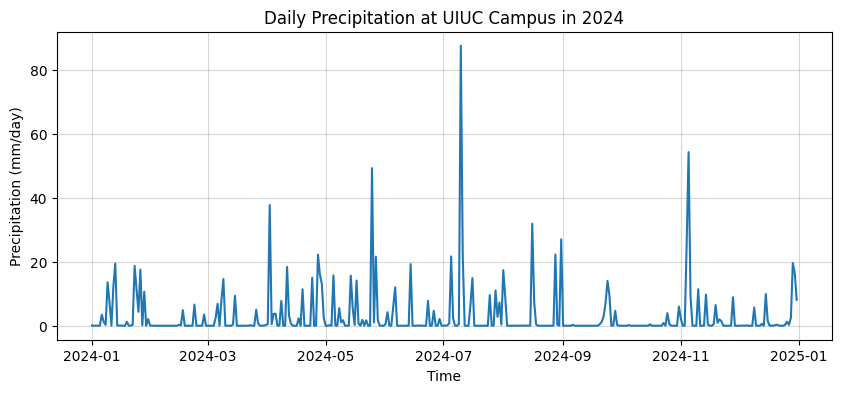

In [46]:
# (e.)
# Plot your line plot!
fig,ax = plt.subplots(figsize=(10, 4))
ax.plot(times2, uiuc_precip)
ax.grid(alpha=0.5)
ax.set_title('Daily Precipitation at UIUC Campus in 2024')
ax.set_ylabel('Precipitation (mm/day)')
ax.set_xlabel('Time')

In [63]:
print(uiuc_precip.max())

87.62724


Text(0, 0.5, 'Frequency (Days)')

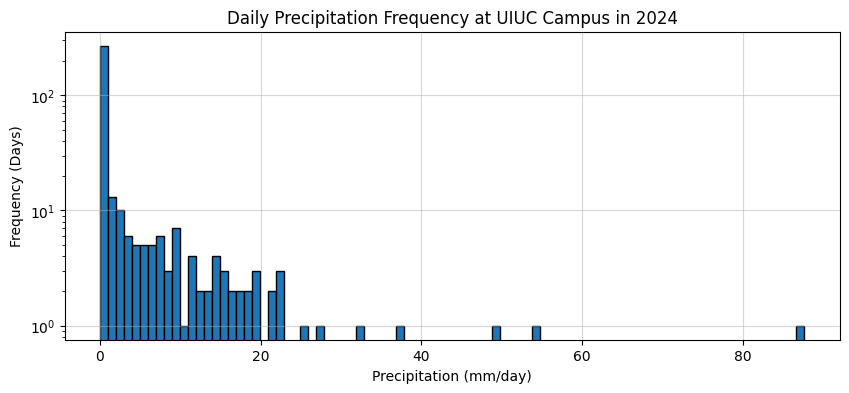

In [68]:
# (f.)
# Plot your histogram!
fig,ax = plt.subplots(figsize=(10, 4))
ax.hist(uiuc_precip, bins=88, edgecolor='black', log=True) # Set y-axis to be logarithmic to make lower freq more visible
ax.grid(alpha=0.5)
ax.set_title('Daily Precipitation Frequency at UIUC Campus in 2024')
ax.set_xlabel('Precipitation (mm/day)')
ax.set_ylabel('Frequency (Days)')

#### (g.) 
#### Interpretation of the histogram

I would say this dataset is not normally distributed because normal distributions exhibit a symmetrical, bell shaped frequency. This data however does not show any symmetry and is highly skewed towards the left side of the plot, or in other words shows very strong positive skewness. This is because there is a much higher frequency of the lower precipitation totals, especially at zero, than there are of higher precipitation totals. If this data were normally distributed, we might see the greatest frequencies somehwere between 20-60 mm/day and then lower frequencies outside of that range, but that is not the case here.